## Practice Exercise (Polynomail Regression)

In [65]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import ELECTRIC_MOTOR_PERFORMANCE

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load and Explore Data

In [67]:
#loading the dataset
df = pd.read_csv(ELECTRIC_MOTOR_PERFORMANCE)

print(f'Shape of the Dataset: {df.shape}')
print(f'Missing Values in dataset:\n {df.isnull().sum()}')

Shape of the Dataset: (15, 3)
Missing Values in dataset:
 Voltage_V         0
Torque_Nm         0
Power_Output_W    0
dtype: int64


In [68]:
#feature and target variables
X = df[['Voltage_V']].values
y_torque = df[['Torque_Nm']].values
y_power = df[['Power_Output_W']].values

#### Polynomial Regression on Torque

In [69]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2,3,4]
results_torque ={}

for degree in degrees:
    poly_torque = PolynomialFeatures(degree=degree)
    X_poly_torque = poly_torque.fit_transform(X)

    model_torque = LinearRegression()
    model_torque.fit(X_poly_torque,y_torque)

    y_pred_torque = model_torque.predict(X_poly_torque)

    R2_score_torque = r2_score(y_pred_torque, y_torque)

    results_torque[degree] = {
        'poly_torque' : poly_torque,
        'model_torque' : model_torque,
        'R2_score_torque' : R2_score_torque
    }

#finding the best fit degree:
    print(f'R2 Score for degree {degree} is {results_torque[degree]['R2_score_torque']:.4f}')

R2 Score for degree 2 is 0.9613
R2 Score for degree 3 is 0.9996
R2 Score for degree 4 is 0.9998


##### Visualization of Polynomial Regression on Torque 

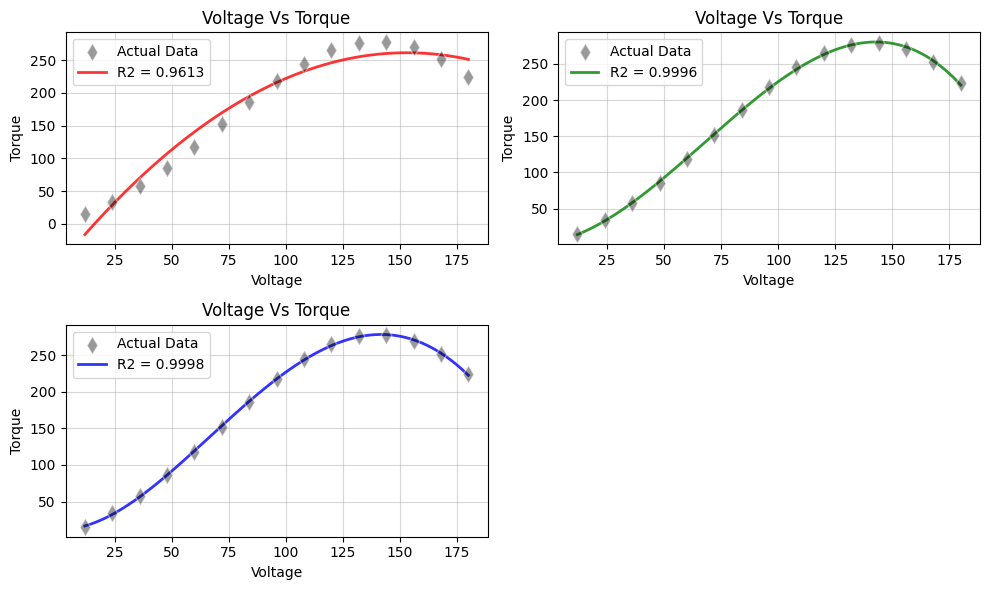

In [70]:
colors=['r','green','blue']
markers=['s','d','*']

plt.figure(figsize=(10,6))

for idx, degree in enumerate(degrees):
    plt.subplot(2,2,idx+1)

    #fit the model
    poly_torque= results_torque[degree]['poly_torque']
    model_torque = results_torque[degree]['model_torque']

    X_poly_torque = poly_torque.transform(X)

    model_torque.fit(X_poly_torque,y_torque)

    #for smooth visualization
    X_smooth = np.linspace(X.min(),X.max(),300).reshape(-1,1)

    X_smooth_poly = poly_torque.transform(X_smooth)

    y_torque_pred_smooth = model_torque.predict(X_smooth_poly)

    plt.scatter(X,y_torque,label='Actual Data',color='black',alpha=0.4,edgecolor='white',s=80,zorder=5,marker='d')
    plt.plot(X_smooth,y_torque_pred_smooth,label=f'R2 = {results_torque[degree]['R2_score_torque']:.4f}',color=colors[idx],linewidth=2,alpha=0.8)
    plt.title(f'Voltage Vs Torque')
    plt.ylabel('Torque')
    plt.xlabel('Voltage')
    plt.legend()
    plt.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()


### Find optimal Voltage for Touque

In [71]:
best_degree = 3

Voltage_search = np.linspace(X.min(),X.max(),10000).reshape(-1,1)

poly_torque = results_torque[best_degree]['poly_torque']
Voltage_search_poly = poly_torque.transform(Voltage_search)

model_torque = results_torque[best_degree]['model_torque']
torque_search_pred = model_torque.predict(Voltage_search_poly)

idx_torque = np.argmax(torque_search_pred)

optimal_voltage = Voltage_search[idx_torque]
optimal_voltage_poly = poly_torque.transform(optimal_voltage.reshape(-1,1))
max_torque = model_torque.predict(optimal_voltage_poly)

print(f'Optimal Voltage for Torque: {optimal_voltage.item():.4f} and maximum torque is {max_torque.item():.4f}')



Optimal Voltage for Torque: 142.8011 and maximum torque is 280.0656


##### Optimal Voltage Visualization

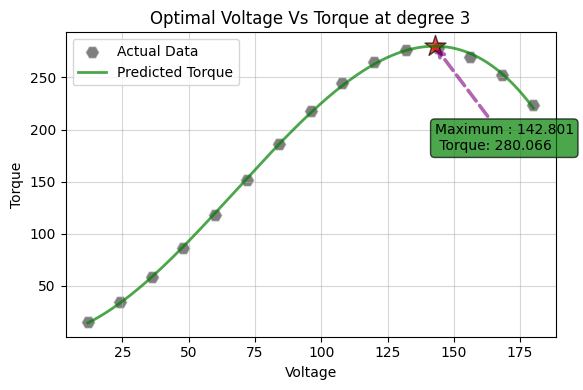

In [100]:
best_fit_torque =3

best_poly_torque = results_torque[best_fit_torque]['poly_torque']
best_model_torque  = results_torque[best_fit_torque]['model_torque']

X_smooth = np.linspace(X.min(),X.max(),300).reshape(-1,1)
X_smooth_torque_poly = best_poly_torque.transform(X_smooth)

y_smooth_torque_pred = best_model_torque.predict(X_smooth_torque_poly)

fig , ax1 = plt.subplots(figsize=(6,4))
ax1.scatter(X,y_torque,label='Actual Data',marker='H',color='black',alpha=0.5,edgecolor='white',s=100)
ax1.plot(X_smooth, y_smooth_torque_pred,label='Predicted Torque',color='green',alpha=0.7,linewidth=2)
ax1.scatter([optimal_voltage],[max_torque],marker='*',s=250,color='r',alpha=0.7,edgecolor='black')
ax1.annotate(
    f'Maximum : {optimal_voltage.item():.3f}\n Torque: {max_torque.item():.3f}',
    xy=(optimal_voltage,max_torque),
    xytext = (optimal_voltage - 0, max_torque -100 ),
    arrowprops= dict(arrowstyle='->',color='purple',linestyle='--',alpha=0.6,linewidth=2.6),
    bbox=dict(boxstyle='round, pad = 0.3',facecolor='green',alpha=0.7)
)
ax1.set_title(f'Optimal Voltage Vs Torque at degree {best_degree}')
ax1.set_ylabel('Torque')
ax1.set_xlabel('Voltage')
ax1.legend()
plt.tight_layout()
ax1.grid(True,alpha=0.5)
plt.show()

#### Polynomial Regression on Power Output

In [101]:
degrees_ln = [1,2,3,4]
results_power = {}

for degree in degrees_ln:
    poly_power = PolynomialFeatures(degree=degree)
    X_poly_power = poly_power.fit_transform(X)

    model_power = LinearRegression()
    model_power.fit(X_poly_power,y_power)

    power_pred = model_power.predict(X_poly_power)

    R2_score_power = r2_score(power_pred,y_power)

    results_power[degree]= {
        'poly_power' : poly_power,
        'model_power' : model_power,
        'R2_score_power' : R2_score_power
    }

    print(f'R2_score for degree {degree} is {R2_score_power:.4f}')

R2_score for degree 1 is 0.9143
R2_score for degree 2 is 0.9712
R2_score for degree 3 is 0.9999
R2_score for degree 4 is 0.9999


##### Comparing the Linear Regression and Polynomial Regression on Power Output

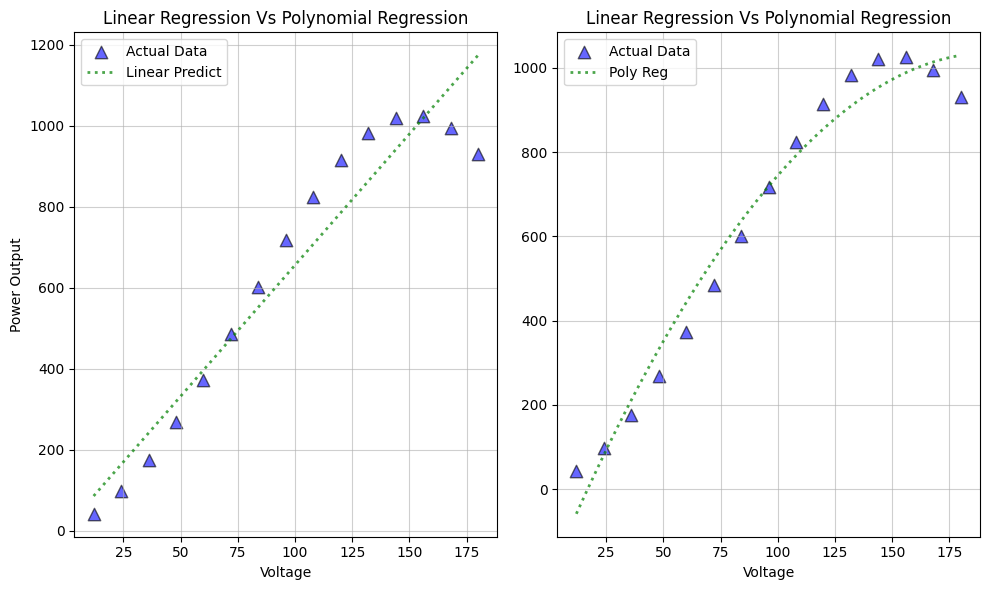

In [119]:
degree = 2

ln_model = LinearRegression()
ln_model.fit(X,y_power)

ln_y_pred = ln_model.predict(X)

poly_power = results_power[degree]['poly_power']
model_power = results_power[degree]['model_power']

X_poly_power = poly_power.transform(X)
y_poly_power_pred = model_power.predict(X_poly_power)

X_smooth = np.linspace(X.min(),X.max(),300).reshape(-1,1)
X_smooth_poly_power = poly_power.transform(X_smooth)
y_smooth_power_pred = model_power.predict(X_smooth_poly_power)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.scatter(X,y_power,label='Actual Data',color='blue',alpha=0.6,marker='^',s=80,edgecolor='black')
ax1.plot(X,ln_y_pred,label='Linear Predict',color='green',alpha=0.7,linewidth=2,linestyle=':')
ax1.set_title('Linear Regression Vs Polynomial Regression')
ax1.set_ylabel('Power Output')
ax1.set_xlabel('Voltage')
ax1.grid(True,alpha=0.6)
ax1.legend()

#polynomial regression

ax2.scatter(X,y_power,label='Actual Data',color='blue',alpha=0.6,marker='^',s=80,edgecolor='black')
ax2.plot(X_smooth,y_smooth_power_pred,label='Poly Reg',color='green',alpha=0.7,linewidth=2,linestyle=':')
ax2.set_title('Linear Regression Vs Polynomial Regression')
ax2.set_xlabel('Voltage')
ax2.grid(True,alpha=0.6)
ax2.legend()


plt.tight_layout()
plt.show()



#### Dual-Axis Visualization
- Left axis: Torque (blue)
- Right axis: Power Output (red)

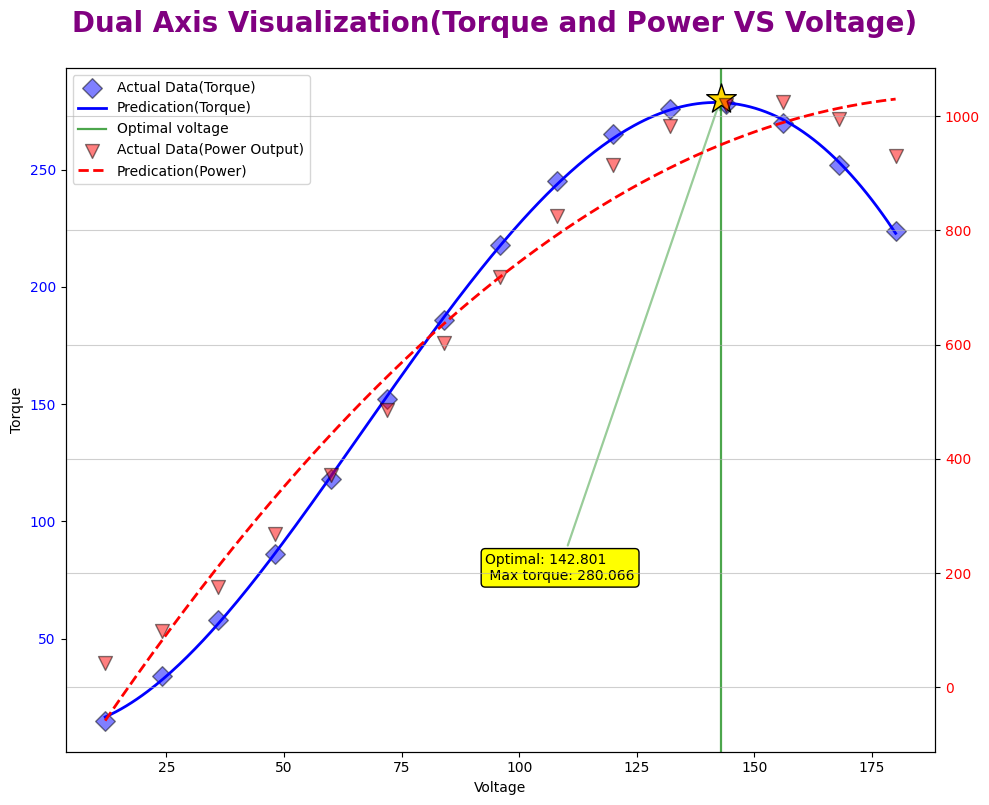

In [158]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.set_ylabel('Torque')
ax1.set_xlabel('Voltage')
ax1.scatter(X,y_torque,label='Actual Data(Torque)',marker='D',color='blue',alpha=0.5,s=100,edgecolor='black')
ax1.plot(X_smooth,y_torque_pred_smooth,label='Predication(Torque)',color='blue',linewidth=2)
ax1.tick_params(axis='y',labelcolor='blue')

#power output
ax2 = ax1.twinx()
ax2.scatter(X,y_power,label='Actual Data(Power Output)', marker='v',color='r',alpha=0.5,s=100,edgecolor='black')
ax2.plot(X_smooth,y_smooth_power_pred,label='Predication(Power)',color='r',linestyle='--',linewidth=2)
ax2.tick_params(axis='y',labelcolor='r')

ax1.axvline(x =optimal_voltage,label='Optimal voltage',color='green',linewidth=1.6,alpha=0.7)
ax1.scatter([optimal_voltage],[max_torque],color='gold',zorder=5,edgecolor='black',s=500,marker='*')
ax1.annotate(f'Optimal: {optimal_voltage.item():.3f}\n Max torque: {max_torque.item():.3f}',
            xy=(optimal_voltage, max_torque),
            xytext=(optimal_voltage - 50, 75),
            arrowprops=dict(arrowstyle='->',color='green',alpha=0.4,linewidth=1.6),
            bbox=dict(boxstyle='round, pad=0.3', facecolor='yellow'))
lines1 , labels1 = ax1.get_legend_handles_labels()
lines2 , labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2 , labels1 + labels2 , fontsize=10)
plt.suptitle(f'Dual Axis Visualization(Torque and Power VS Voltage)',y=1,fontsize=20,fontweight=600,color='purple')
plt.grid(True,alpha=0.6)
plt.tight_layout()
plt.show()

